# Use Case Example #1

## Setup

In this example, we will show case 


In [ ]:
from canoPyHydro.CylinderCollection import CylinderCollection

# Initializing a CylinderCollection object
myCollection = CylinderCollection()

# Converting a specified file to a CylinderCollection object
myCollection.from_csv("example_tree.csv")

# Requesting an plot of the tree projected onto the XZ plane ('fromt' view)
myCollection.project_cylinders("XZ")
myCollection.draw("XZ")

# Requesting an plot of the tree projected onto the YZ plane ('side' view)
myCollection.project_cylinders("YZ")
myCollection.draw("YZ")

# Requesting an plot of the tree projected onto the XY plane (Birds eye view)
myCollection.project_cylinders("XY")
myCollection.draw("XY")

Cylinder projection: 47.0
Cylinder projection: 59.2
Cylinder projection: 71.0
Cylinder projection: 81.9
Cylinder projection: 90.0
reached_End of find flows
Cylinder projection: 8.7
Cylinder projection: 59.7
Cylinder projection: 72.4
Cylinder projection: 83.8


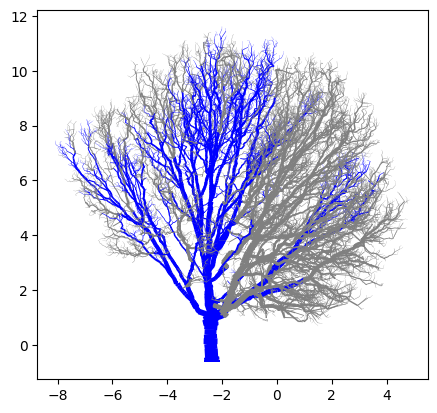

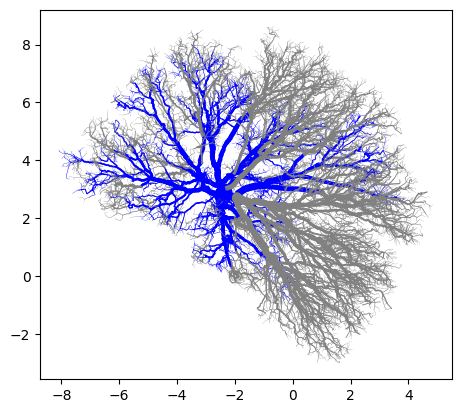

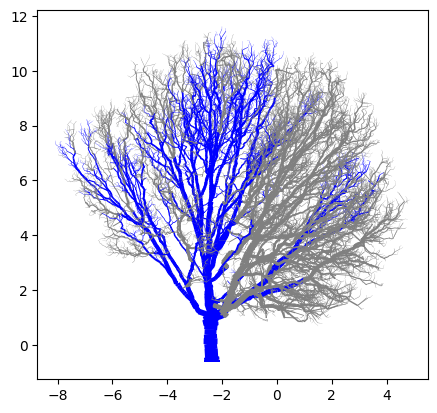

In [3]:
# Finding and Highlighting the stem flow component
import os
os.environ["CANOPYHYDRO_CONFIG"] = "./canopyhydro_config.toml"
from src.canopyhydro.CylinderCollection import CylinderCollection
from matplotlib import pyplot as plt

# Initializing a CylinderCollection object
myCollection = CylinderCollection()

# Converting a specified file to a CylinderCollection object
myCollection.from_csv("example_tree.csv")

# Requesting an plot of the tree projected onto the XZ plane ('fromt' view)
myCollection.project_cylinders("XY")


myCollection.initialize_digraph_from()
myCollection.find_flow_components()
myCollection.calculate_flows()


myCollection.draw(
    "XY", highlight_lambda=lambda: is_stem, save=True, file_name_ext="docs_ex"
)
myCollection.draw(
    "XZ", highlight_lambda=lambda: is_stem, save=True, file_name_ext="docs_ex"
)

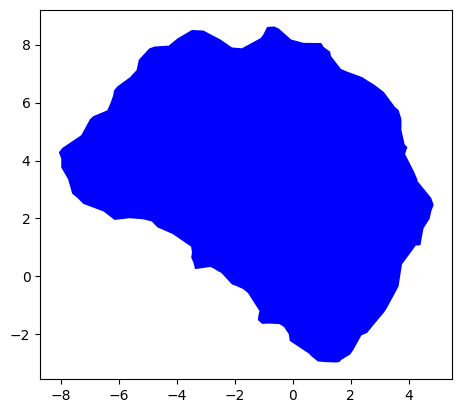

In [4]:
myCollection.watershed_boundary(plane='XY' ,draw=True, stem=True, save=True, file_name_ext="docs_ex")

In [1]:
# Finding and Highlighting the stem flow component
import os
os.environ["CANOPYHYDRO_CONFIG"] = "./canopyhydro_config.toml"
from src.canopyhydro.CylinderCollection import CylinderCollection
from matplotlib import pyplot as plt

# Initializing a CylinderCollection object
myCollection = CylinderCollection()

# Converting a specified file to a CylinderCollection object
myCollection.from_csv("example_tree.csv")

# Requesting an plot of the tree projected onto the XZ plane ('fromt' view)
myCollection.project_cylinders("XY")


myCollection.initialize_digraph_from()
myCollection.find_flow_components()
myCollection.calculate_flows()
myCollection.watershed_boundary(
                component=myCollection.stem_flow_component,
                plane='XY',
                draw=True,
                stem=True,
                save=True, file_name_ext="stem_alpha")

Cylinder projection: 26.0


In [1]:
# Drawing various branch orders
from matplotlib import pyplot as plt
import os

os.environ["CANOPYHYDRO_CONFIG"] = "./canopyhydro_config.toml"
from src.canopyhydro.CylinderCollection import CylinderCollection

# Initializing a CylinderCollection object
myCollection = CylinderCollection()

# Converting a specified file to a Cyl0nderCollection object
myCollection.from_csv("example_tree.csv")

# Requesting an plot of the tree projected onto the XZ plane ('fromt' view)
myCollection.project_cylinders("XY")
fix, ax = plt.subplots(4, 1, figsize=(10, 10))
ax[0] = myCollection.draw(
    "XZ",
    filter_lambda=lambda: branch_order <= 1,
    highlight_lambda=lambda: branch_order == 1,
    save=True,
    file_name_ext="_bo_le_1",
)
ax[1] = myCollection.draw(
    "XZ",
    filter_lambda=lambda: branch_order <= 2,
    highlight_lambda=lambda: branch_order == 2,
    save=True,
    file_name_ext="_bo_le_2",
)
ax[2] = myCollection.draw(
    "XZ",
    filter_lambda=lambda: branch_order <= 3,
    highlight_lambda=lambda: branch_order == 3,
    save=True,
    file_name_ext="_bo_le_3",
)
ax[3] = myCollection.draw(
    "XZ",
    filter_lambda=lambda: branch_order <= 4,
    highlight_lambda=lambda: branch_order == 4,
    save=True,
    file_name_ext="_bo_le_4",
)
plt.show()

Cylinder projection: 15.3
Cylinder projection: 37.6
Cylinder projection: 45.9
Cylinder projection: 49.1
Cylinder projection: 25.3
Cylinder projection: 26.8
Cylinder projection: 31.7
Cylinder projection: 43.1
Cylinder projection: 50.4
